In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
# Store dicitionary of datasets / names

files = {
    "zillow_df": "Metro_zhvi_uc_sfrcondo_tier_0.33_0.67_sm_sa_month.csv",
    "fred_df": "MORTGAGE30US.csv",
    "cpi_df": "CORESTICKM159SFRBATL.csv",
    "ff_df": "DFF.csv",
    "tenyr_df": "DGS10.csv",
    "house_starts_df": "HOUST.csv",
    "income_df": "MEHOINUSA672N (1).csv",
    "unemp_df": "UNRATE.csv"
}

# Loop through dictionary / read csvs
dfs = {name: pd.read_csv(path) for name, path in files.items()}

# Makes it so we can access using the names I allotted
globals().update(dfs)


In [5]:
# Preview data

display(zillow_df.head(), fred_df.head(), cpi_df.head(), ff_df.head(), tenyr_df.head(), house_starts_df.head(), income_df.head(), unemp_df.head())

,RegionID,SizeRank,RegionName,RegionType,StateName,2000-01-31,2000-02-29,2000-03-31,2000-04-30,2000-05-31,...,2024-09-30,2024-10-31,2024-11-30,2024-12-31,2025-01-31,2025-02-28,2025-03-31,2025-04-30,2025-05-31,2025-06-30
0,102001,0,United States,country,NaN,124952.583264,125172.414915,125445.038530,126029.762672,126702.710055,...,368342.550149,368944.348980,369448.501052,370184.720224,370828.567353,371298.260498,371016.982722,370477.532421,369777.238792,369146.758903
1,394913,1,"New York, NY",msa,NY,224104.107786,225056.423800,226017.559977,227965.193784,229982.036039,...,694463.939098,698112.907260,700981.582357,702828.956760,703938.611027,705266.111170,707009.440660,709510.127516,711326.861714,712842.475773
2,753899,2,"Los Angeles, CA",msa,CA,228441.264620,229291.355968,230423.669537,232676.593166,235140.585322,...,979263.294758,984668.937931,989326.464086,993489.580771,994044.173013,991951.863479,986697.459794,982246.652053,977325.621835,972836.618922
3,394463,3,"Chicago, IL",msa,IL,159204.293651,159351.670450,159632.352157,160330.618493,161170.548906,...,336401.662700,337417.542386,338496.548214,339792.563198,341188.253115,342585.506509,343463.210750,344086.738417,344388.252982,344762.755307
4,394514,4,"Dallas, TX",msa,TX,130776.117982,130834.366121,130901.328321,131075.222120,131304.496332,...,386210.886078,386101.104828,385802.176509,385258.927239,384716.914401,383910.093012,382370.526648,380191.067291,377715.452411,375293.228730


,observation_date,MORTGAGE30US
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


,observation_date,CORESTICKM159SFRBATL
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


,observation_date,DFF
0,2020-08-08,0.1
1,2020-08-09,0.1
2,2020-08-10,0.1
3,2020-08-11,0.1
4,2020-08-12,0.1


,observation_date,DGS10
0,2020-08-10,0.59
1,2020-08-11,0.64
2,2020-08-12,0.69
3,2020-08-13,0.71
4,2020-08-14,0.71


,observation_date,HOUST
0,1959-01-01,1657
1,1959-02-01,1667
2,1959-03-01,1620
3,1959-04-01,1590
4,1959-05-01,1498


,observation_date,MEHOINUSA672N
0,1984-01-01,58930
1,1985-01-01,60050
2,1986-01-01,62280
3,1987-01-01,63060
4,1988-01-01,63530


,observation_date,UNRATE
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [9]:
# melt zillow columns

zillow_new = zillow_df.melt(
    var_name="Date",
    value_name="MedianPrice")[['Date', 'MedianPrice']]

In [11]:
# convert zillow to datetime

zillow_new["Date"] = pd.to_datetime(zillow_new["Date"], errors="coerce")

/var/folders/q0/rp311cxj6qg302m63zf3qm5m0000gn/T/ipykernel_58971/3998180386.py:3: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  zillow_new["Date"] = pd.to_datetime(zillow_new["Date"], errors="coerce")


In [13]:
# drop blanks for MedianPrice col

zillow_new.dropna(subset=["MedianPrice"], inplace=True)

# Aggregate to national average
zillow_new = zillow_new.groupby("Date")["MedianPrice"].mean().reset_index()

In [15]:
zillow_new.head()

,Date,MedianPrice
0,2000-01-31,111789.383087
1,2000-02-29,111972.19016
2,2000-03-31,112131.162879
3,2000-04-30,112832.414299
4,2000-05-31,113589.585871


In [17]:
# rename columns

zillow_new.rename(columns={'MedianPrice': 'Median Price'}, inplace=True)

fred_df.rename(columns={"MORTGAGE30US": "Mortgage Rate"}, inplace=True)

cpi_df.rename(columns={"CORESTICKM159SFRBATL": "CPI"}, inplace=True)

ff_df.rename(columns={"DFF": "Fed Funds Rate"}, inplace=True)

tenyr_df.rename(columns={"DGS10": "10Yr"}, inplace=True)

house_starts_df.rename(columns={"HOUST": "Housing Starts"}, inplace=True)

income_df.rename(columns={"MEHOINUSA672N": "Median Income"}, inplace=True)

unemp_df.rename(columns={"UNRATE": "Unemployment Rate"}, inplace=True)

In [19]:
display(zillow_new.head(), fred_df.head(), cpi_df.head(), ff_df.head(), tenyr_df.head(), house_starts_df.head(), income_df.head(), unemp_df.head())

,Date,Median Price
0,2000-01-31,111789.383087
1,2000-02-29,111972.19016
2,2000-03-31,112131.162879
3,2000-04-30,112832.414299
4,2000-05-31,113589.585871


,observation_date,Mortgage Rate
0,1971-04-02,7.33
1,1971-04-09,7.31
2,1971-04-16,7.31
3,1971-04-23,7.31
4,1971-04-30,7.29


,observation_date,CPI
0,1968-01-01,3.651861
1,1968-02-01,3.673819
2,1968-03-01,4.142164
3,1968-04-01,4.155828
4,1968-05-01,4.088245


,observation_date,Fed Funds Rate
0,2020-08-08,0.1
1,2020-08-09,0.1
2,2020-08-10,0.1
3,2020-08-11,0.1
4,2020-08-12,0.1


,observation_date,10Yr
0,2020-08-10,0.59
1,2020-08-11,0.64
2,2020-08-12,0.69
3,2020-08-13,0.71
4,2020-08-14,0.71


,observation_date,Housing Starts
0,1959-01-01,1657
1,1959-02-01,1667
2,1959-03-01,1620
3,1959-04-01,1590
4,1959-05-01,1498


,observation_date,Median Income
0,1984-01-01,58930
1,1985-01-01,60050
2,1986-01-01,62280
3,1987-01-01,63060
4,1988-01-01,63530


,observation_date,Unemployment Rate
0,1948-01-01,3.4
1,1948-02-01,3.8
2,1948-03-01,4.0
3,1948-04-01,3.9
4,1948-05-01,3.5


In [21]:
# For all dfs (excluding zillow):
 # - change 'observation_date' column to datetime
 # - drop 'observation_date' columm
 # - Use the average of values for monthly data and set to a monthly index
 # - assign new df names


# List of DataFrames
dfs = [fred_df, cpi_df, ff_df, tenyr_df, house_starts_df, income_df, unemp_df]

# Empty list to store the monthly DataFrames
monthly_dfs = []

# Loop
for df in dfs:
    # Convert the date column to datetime
    df['Date'] = pd.to_datetime(df['observation_date'], errors='coerce')
    
    # Drop the original observation_date column
    df.drop(columns=['observation_date'], inplace=True)
    
    # Set the Date as index, resample monthly, take the mean, and reset the index
    df_monthly = df.set_index('Date').resample('ME').mean().reset_index()
    
    # Add the processed DataFrame to the list
    monthly_dfs.append(df_monthly)

# Assign the monthly DataFrames to individual variables
fred_monthly, cpi_monthly, ff_monthly, tenyr_monthly, house_starts_monthly, income_monthly, unemp_monthly = monthly_dfs

# Check one of them
income_monthly.head()

,Date,Median Income
0,1984-01-31,58930.0
1,1984-02-29,NaN
2,1984-03-31,NaN
3,1984-04-30,NaN
4,1984-05-31,NaN


In [23]:
#  median income monthly

monthly_data = []

# Iterate through each year in the dataset
for _, row in income_monthly.iterrows():
    year = row['Date'].year
    income = row['Median Income']
    # Generate 12 monthly dates for the year
    for month in range(1, 13):
        monthly_date = pd.to_datetime(f'{year}-{month:02d}-01')
        monthly_data.append({
            'Median Income': income,
            'Date': monthly_date
        })


# Convert to DataFrame
income_monthly_df = pd.DataFrame(monthly_data)

monthly_income = income_monthly_df.set_index("Date").resample("ME").mean().reset_index()


In [25]:
# Merge datasets

dfs = [
    zillow_new,
    fred_monthly,
    cpi_monthly,
    ff_monthly,
    tenyr_monthly,
    house_starts_monthly,
    monthly_income,
    unemp_monthly
]

# Start with the first DataFrame
housing_df = dfs[0]

# Sequentially merge with each subsequent DataFrame
for df in dfs[1:]:
    housing_df = pd.merge(housing_df, df, on="Date", how="inner")

# Inspect the result
housing_df.head()


,Date,Median Price,Mortgage Rate,CPI,Fed Funds Rate,10Yr,Housing Starts,Median Income,Unemployment Rate
0,2020-08-31,211189.130496,2.935,2.222020,0.093750,0.681250,1396.0,79560.0,8.4
1,2020-09-30,213912.982912,2.890,1.991587,0.090000,0.679524,1473.0,79560.0,7.8
2,2020-10-31,216621.836598,2.834,1.749610,0.090000,0.787143,1543.0,79560.0,6.9
3,2020-11-30,220088.311881,2.765,1.707378,0.086333,0.870000,1543.0,79560.0,6.7
4,2020-12-31,223113.176587,2.684,1.603908,0.090000,0.933636,1614.0,79560.0,6.7


## Takeaways:

### 1. Home prices surged from 2020 through mid-2022, then plateaued as mortgage rates climbed toward 7% by 2023.

### 2. Aggressive Fed Funds Rate hikes slowed housing price growth, signaling monetary policy’s cooling effect on demand.

### 3. Mortgage rates more than doubled between 2020 and late 2022, creating significant affordability headwinds.


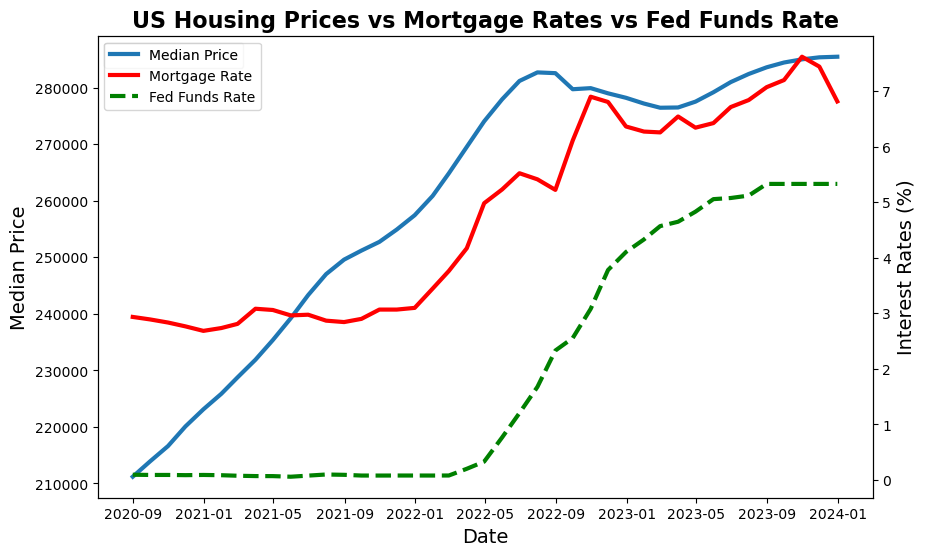

In [29]:
fig, ax1 = plt.subplots(figsize=(10,6))

# Median Price (left axis)
sns.lineplot(data=housing_df, x="Date", y="Median Price", ax=ax1, label="Median Price", linewidth=3)

ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Median Price", fontsize=14)

# Mortgage Rate + Fed Funds Rate (right axis)
ax2 = ax1.twinx()
sns.lineplot(data=housing_df, x="Date", y="Mortgage Rate", ax=ax2, color="red", label="Mortgage Rate", linewidth=3)
sns.lineplot(data=housing_df, x="Date", y="Fed Funds Rate", ax=ax2, color="green", label="Fed Funds Rate", linewidth=3, linestyle="--")

ax2.set_ylabel("Interest Rates (%)", fontsize=14)

# Title
plt.title("US Housing Prices vs Mortgage Rates vs Fed Funds Rate", fontsize=16, fontweight="bold")

# Combine legends
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc="upper left")


## Takeaways:

### 1. Housing starts peaked near 1.8 million units in Q2 2022, marking the post-pandemic high.

### 2. As mortgage rates climbed above 5% in mid-2022, housing starts declined sharply, reflecting affordability pressures.

### 3. The data suggests a strong inverse relationship between mortgage rates and housing construction activity.

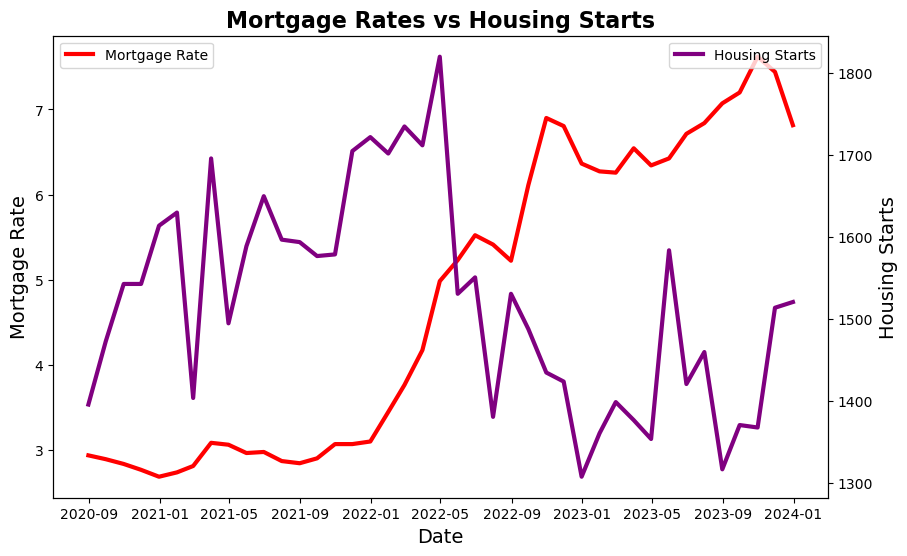

In [31]:
# vis "Rates vs Starts"

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Mortgage Rate", fontsize=14)

sns.lineplot(data=housing_df, x="Date", y="Mortgage Rate", label="Mortgage Rate", color='Red', linewidth=3)

ax2 = plt.twinx()

ax2.set_ylabel("Housing Starts", fontsize=14)
sns.lineplot(data=housing_df, x="Date", y="Housing Starts", ax=ax2, color="purple", label="Housing Starts", linewidth=3)
plt.title("Mortgage Rates vs Housing Starts", fontsize=16, fontweight="bold")
plt.show()

In [33]:
housing_df.describe()

,Date,Mortgage Rate,CPI,Fed Funds Rate,10Yr,Housing Starts,Unemployment Rate
count,41,41.000000,41.000000,41.000000,41.000000,41.000000,41.000000
mean,2022-04-30 22:14:38.048780544,4.757341,4.143405,1.996603,2.540705,1523.707317,4.587805
min,2020-08-31 00:00:00,2.684000,1.391588,0.058065,0.679524,1308.000000,3.400000
25%,2021-06-30 00:00:00,2.962500,2.335721,0.080000,1.465000,1404.000000,3.600000
50%,2022-04-30 00:00:00,4.982500,4.557667,0.330000,2.747500,1531.000000,3.800000
75%,2023-02-28 00:00:00,6.425000,5.593246,4.570000,3.663043,1597.000000,5.800000
max,2023-12-31 00:00:00,7.620000,6.545514,5.330000,4.798095,1820.000000,8.400000
std,NaN,1.787525,1.785560,2.227232,1.267030,130.385821,1.382786


## Takeaways:

### 1. Mortgage Rates, the 10-Year Treasury, and the Fed Funds Rate are highly correlated (0.9+), reflecting the strong influence of monetary policy and bond markets on borrowing costs.

### 2. Housing Starts are negatively correlated with rates (-0.6 to -0.7), showing that higher borrowing costs weigh heavily on new construction.

### 3. Unemployment Rate is strongly negatively correlated with Median Home Prices (-0.96), highlighting how a weakening labor market tends to coincide with housing market slowdowns.

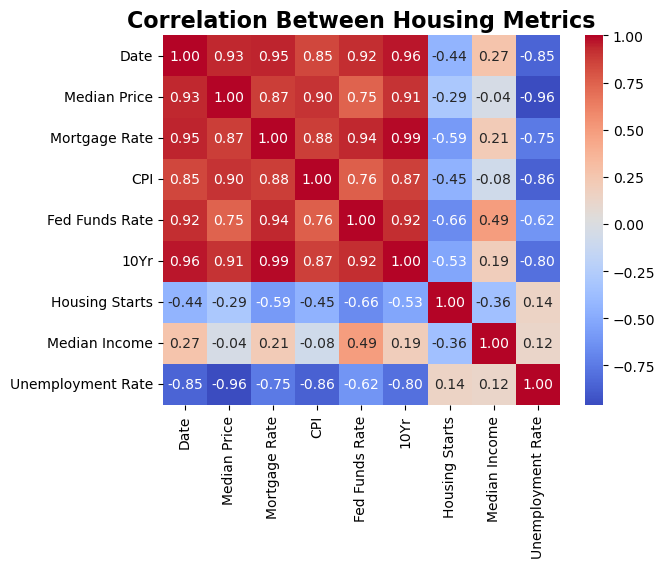

In [47]:
# Housing Correlation

sns.heatmap(housing_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Between Housing Metrics", fontweight='bold', fontsize=16)
plt.show()

## Takeaways:

### 1. The Fed Funds Rate remained near zero through early 2022, then climbed rapidly above 5% by mid-2023, marking one of the fastest tightening cycles in decades.

### 2. Housing starts declined significantly as rates rose, reflecting the sensitivity of new construction to higher borrowing costs.

### 3. The inverse relationship is clear: Fed policy tightening coincides with reduced housing supply expansion, underscoring the transmission of monetary policy into the housing market.

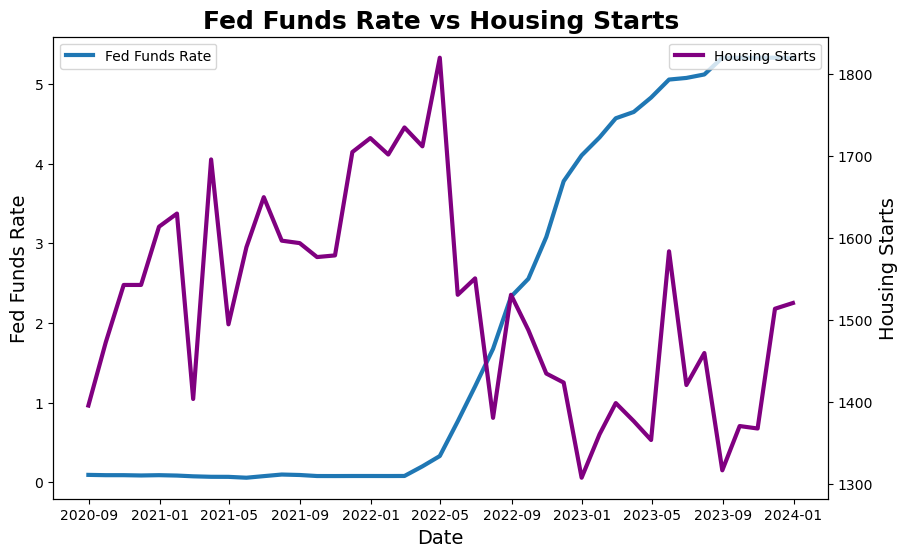

In [54]:
# vis "Fed Funds vs Starts"

fig, ax1 = plt.subplots(figsize=(10,6))

ax1.set_xlabel("Date", fontsize=14)
ax1.set_ylabel("Fed Funds Rate", fontsize=14)

sns.lineplot(data=housing_df, x="Date", y="Fed Funds Rate", label="Fed Funds Rate", linewidth=3)

ax2 = plt.twinx()
ax2.set_ylabel("Housing Starts", fontsize=14)


sns.lineplot(data=housing_df, x="Date", y="Housing Starts", ax=ax2, color="purple", label="Housing Starts", linewidth=3)

plt.title("Fed Funds Rate vs Housing Starts", fontsize=18, fontweight='bold')
plt.show()